
[Link to Github Repository](https://github.com/richardmonteslemus/eds220-hwk4)
- This repository contains code, file structures, and references for the following Eaton and Palisades fire analysis. 

# About

### Purpose: 
The Eaton and Palisades fires of January 2025 exacerbated by the Santa Ana Winds wrecked havoc Southern California. Thousands of homes were burned and people displaced. 

This notebook uses false color imagery to visualize the aftermath of the Eaton and Palisades fires in Southern California Feb 23, 2025. 

Furthermore, this analussi plots census tracts with limited englihs profeciincy within the Eaton and Fire perimeters. During emergencies such as these fires, effective emergency communitication is paramount. These alertts were sent out in Englihs and Spanish but communities that did not speak either were left at a disadvantage. Currently the EJ data for this analysis does not contain a category for non english speaking or spanish speaking census tracts so this hides the vulnerablity of non egnlihs and spanish peaking communities imapcted by this fire. 


# About

### Purpose: 
The Eaton and Palisades fires of January 2025, exacerbated by Santa Ana winds, wreaked havoc across Southern California. Thousands of homes were burned and residents displaced.

This notebook uses false color imagery to visualize the aftermath of the Eaton and Palisades fires as of February 23, 2025.

Furthermore, this analysis examines limited English proficiency (LEP) populations within the fire perimeters to highlight language barriers during emergency response. Emergency alerts were disseminated only in English and Spanish, leaving communities speaking other languages without access to life-saving information. According to UCLA researchers, nearly 50,000 Asian Americans were impacted by these fires, with over 12,000 having limited English proficiency and facing significant communication barriers.

**Data Limitation:** The LEP metric used in this analysis includes all individuals who speak English "less than well," which includes Spanish speakers who did receive alerts in Spanish. This means the visualizations overestimate the population that was truly excluded from emergency communications. Ideally, this analysis would isolate non-English, non-Spanish speaking populations, but this data is not available in the current EJScreen dataset. Despite this limitation, the maps still reveal census tracts with high concentrations of language isolated populations and highlight the need for more multilingual emergency alert systems.

### Highlights: 
- Plotting RGB true color map 
- Plotting False-color image map (SWIR‑NIR‑Red)
- Plotting False-color image map (SWIR‑NIR‑Red) within Eaton and Palisades parameters
- Plotting census tracts with limited English proficiency within Eaton and Palisades parameters

### Data descriptions: 
**Eaton_Perimeter_20250121.shp** 
- This data consists of Eaton dissolved perimeter data from Los Angeles County.

**Palisades_Perimeter_20250121.shp**
- This data consists of Palisades dissolved perimeter data from Los Angeles County.

**landsat8-2025-02-23-palisades-eaton.nc**
- This Landsat data consists of atmospherically corrected surface reflectance and surface temperature image data. 

**EJI_2024_California.gdp**
- This data consist of several environmental justice variables and corresponsing census tracts and geometry. 

### References: 

[1] ArcGIS Online. Palisades and Eaton Dissolved Fire Perimeters as of 20250121 [Feature service]. Available: https://services.arcgis.com/RmCCgQtiZLDCtblq/arcgis/rest/services/Palisades_and_Eaton_Dissolved_Fire_Perimeters_as_of_20250121/FeatureServer/0
. [Accessed Nov 22, 2025].

[2] U.S. Geological Survery. _Landsat Collection 2 Level-2 Surface Reflectance (Microsoft Planetary Computer Version)_ [data file]. Available: https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2. [Accessed Nov 22, 2025]

[3] Agency for Toxic Substances and Disease Registry (ATSDR). _Environmental Justice Index (EJI) 2022_ [data file]. Centers for Disease Control and Prevention. Available: https://www.atsdr.cdc.gov/place-health/php/eji/eji-data-download.html. [Accessed Dec 3, 2025].




In [31]:
# Import libraries
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr   
import netCDF4
import contextily as ctx

# Task 2

## 2. Fire perimeter data exploration

Exploration summary:  
The fire perimeter data I found is a layer containing fire perimeters/boundaries for Eaton and Palisades fires. Its is projected and has the EPSG:3857 CRS. And it represents the fire perimeters with polygons. 

In [32]:
# Read in Palisades and Eaton fire perimeter data 
fp_eaton = os.path.join('data','Eaton_Perimeter_20250121','Eaton_Perimeter_20250121.shp')
eaton = gpd.read_file(fp_eaton)

fp_pal = os.path.join('data','Palisades_Perimeter_20250121','Palisades_Perimeter_20250121.shp')
palisades = gpd.read_file(fp_pal)

In [33]:
# Check the projection and coordinate reference system of data 
eaton.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [34]:
# Check the projection and coordinate reference system of data 
palisades.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [35]:
# Check the first 5 rows of data 
eaton.head()

,OBJECTID,type,Shape__Are,Shape__Len,geometry
0,1,Heat Perimeter,2206.265625,270.199719,"POLYGON ((-13146936.686 4051222.067, -13146932..."
1,2,Heat Perimeter,20710.207031,839.204218,"POLYGON ((-13150835.463 4052713.929, -13150831..."
2,3,Heat Perimeter,3639.238281,250.304502,"POLYGON ((-13153094.697 4053057.596, -13153113..."
3,4,Heat Perimeter,1464.550781,148.106792,"POLYGON ((-13145097.740 4053118.235, -13145100..."
4,5,Heat Perimeter,4132.753906,247.960744,"POLYGON ((-13153131.126 4053196.882, -13153131..."


In [36]:
# Check the first 5 rows of data 
palisades.head()

,OBJECTID,type,Shape__Are,Shape__Len,geometry
0,1,Heat Perimeter,1182.082031,267.101144,"POLYGON ((-13193543.302 4032913.077, -13193543..."
1,2,Heat Perimeter,2222.488281,185.498783,"POLYGON ((-13193524.155 4033067.953, -13193524..."
2,3,Heat Perimeter,21.011719,22.412814,"POLYGON ((-13193598.085 4033158.222, -13193598..."
3,4,Heat Perimeter,214.992188,76.639180,"POLYGON ((-13193654.249 4033146.033, -13193656..."
4,5,Heat Perimeter,44203.453125,1569.259764,"POLYGON ((-13194209.580 4033236.320, -13194209..."


In [37]:
# Check data column types 
eaton.dtypes

OBJECTID         int64
type            object
Shape__Are     float64
Shape__Len     float64
geometry      geometry
dtype: object

In [38]:
# Check data column types 
palisades.dtypes

OBJECTID         int64
type            object
Shape__Are     float64
Shape__Len     float64
geometry      geometry
dtype: object

# 3. NetCDF data import and exploration

Exploration summary:  
This landsat data is stored in a NetCDF data format with each layer being a matrix. Upon exploring this data I found that it is 3 dimensional. it contains one layer representing time, and another two representing x and y coordinates on a map. Y coordinates decrease as you go down (south) and X coordinates increase as you go right (east). Its CRS is EPSG:32611, its units are meters, and its resolution is 30 meters and it is projected. It contains this information for red, green, blue, nir08, and swir22 bands. 


In [39]:
# Read in collection of bands data 
landsat = xr.open_dataset(os.path.join("data","landsat8-2025-02-23-palisades-eaton.nc"))
landsat

<xarray.Dataset> Size: 78MB
Dimensions:      (y: 1418, x: 2742)
Coordinates:
  * y            (y) float64 11kB 3.799e+06 3.799e+06 ... 3.757e+06 3.757e+06
  * x            (x) float64 22kB 3.344e+05 3.344e+05 ... 4.166e+05 4.166e+05
    time         datetime64[ns] 8B ...
Data variables:
    red          (y, x) float32 16MB ...
    green        (y, x) float32 16MB ...
    blue         (y, x) float32 16MB ...
    nir08        (y, x) float32 16MB ...
    swir22       (y, x) float32 16MB ...
    spatial_ref  int64 8B ...

# 4. Restoring geospatial information

In [40]:
# a. Print crs of band data
print('CRS:' , landsat.rio.crs)

CRS: None


The landsat data is not a geospatial object because it does not have a coordinate reference system.

In [41]:
# b. Print crs by accessing attribute of dataset
landsat.spatial_ref.crs_wkt

'PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32611"]]'

In [42]:
# c. Recover crs of band data 
landsat = landsat.rio.write_crs(landsat.spatial_ref.crs_wkt)
# d. Print recovered crs
print('CRS:' , landsat.rio.crs)

CRS: EPSG:32611


# 5. True color image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[]

/opt/anaconda3/envs/eds220-env/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


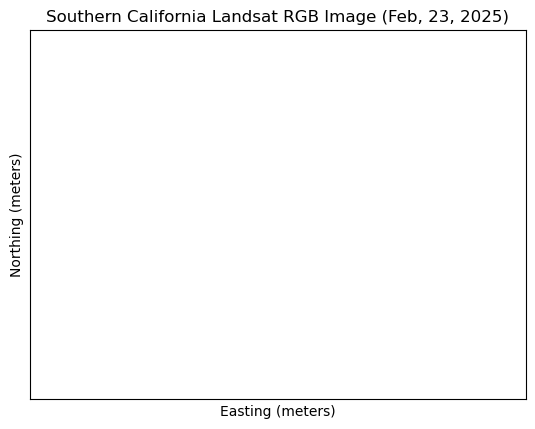

In [43]:
# a. Extract RGB variables and plot
figure = landsat[["red","green","blue"]].to_array().plot.imshow()

# Add axis labels and title
ax = figure.axes
ax.set_title("Southern California Landsat RGB Image (Feb, 23, 2025)")
ax.set_xlabel("Easting (meters)")
ax.set_ylabel("Northing (meters)")
# Remove ticks 
ax.set_xticks([])         
ax.set_yticks([])     

[]

/opt/anaconda3/envs/eds220-env/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


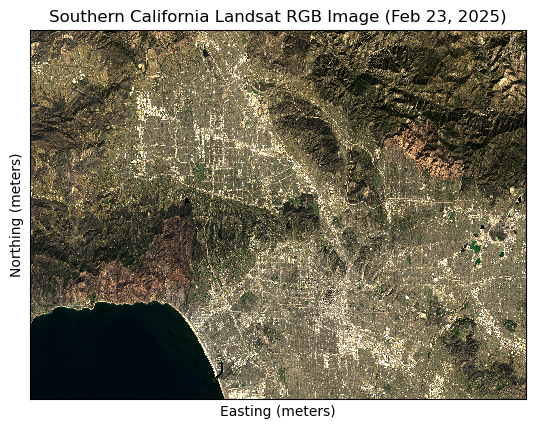

In [44]:
# b. Adjust band scale 
# Address cloud outlier problem
figure = landsat[["red","green","blue"]].to_array().plot.imshow(robust=True)

# Add axis labels and title
ax = figure.axes
ax.set_title("Southern California Landsat RGB Image (Feb 23, 2025)")
ax.set_xlabel("Easting (meters)")
ax.set_ylabel("Northing (meters)")
# Remove ticks 
ax.set_xticks([])         
ax.set_yticks([])     

In [45]:
# c. Check number of NAs in each band
for band in ["red","green","blue"]:
    print(band, np.isnan(landsat[band]).sum().item())


red 0
green 1
blue 109


In [46]:
# d. Substitute nan with zero 
landsat = landsat.fillna(0)

# Ensure nas are converted into zero
for band in ["red","green","blue"]:
    print(band, np.isnan(landsat[band]).sum().item())


red 0
green 0
blue 0


[]

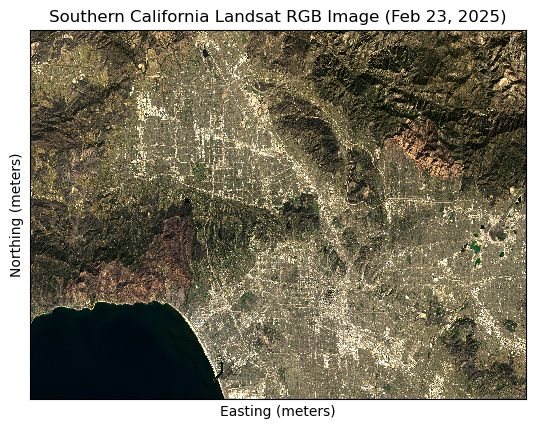

In [47]:
# e. Create rgb image without warnings
# Plot RGB after addressing cloud outlier problem
figure = landsat[["red","green","blue"]].to_array().plot.imshow(robust=True)

# Add axis labels and title
ax = figure.axes
ax.set_title("Southern California Landsat RGB Image (Feb 23, 2025)")
ax.set_xlabel("Easting (meters)")
ax.set_ylabel("Northing (meters)")
# Remove ticks 
ax.set_xticks([])         
ax.set_yticks([])     


#### f. 
Part a was a blank white map, it looked like this because clouds were outliers and they distorted the scale. It made it impossible to see the rest of the rgb colors on the map. It also plotted nans which caused an error. The map in part e on the other hand used robust = true to remove the top and bottom percentiles from the plot in order to ensure RGB values got plotted. Also, it turned nans into zeros in order to eliminate the error. 

# 6. False color image

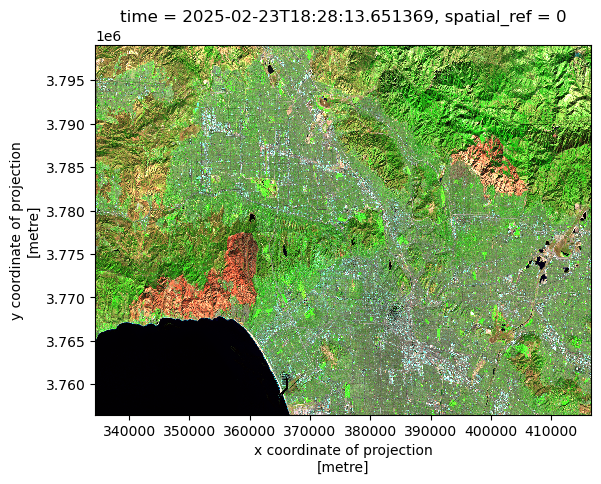

In [48]:
# e. Create false color image without warnings
# Plot swie22, nir, and red after addressing cloud outlier problem

landsat[["swir22","nir08","red"]].to_array().plot.imshow(robust=True)

# 7. Map fire perimeters onto false color map


In [49]:
# Convert fire perimeter data crs to match landsat crs
eaton = eaton.to_crs(crs = landsat.rio.crs)
palisades = palisades.to_crs(crs = landsat.rio.crs)

# Check crs convertion
print(eaton.crs)
print(palisades.crs)

PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32611"]]
PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER

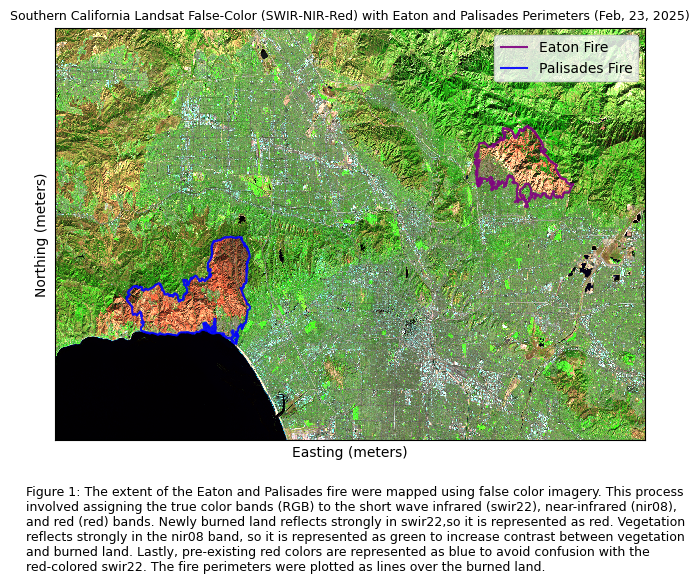

In [50]:
fig, ax = plt.subplots(1, 1)

eaton.boundary.plot( # Plot fire perimeter boundary
    ax = ax, 
    alpha = 0.9,
    edgecolor = "purple",
    label="Eaton Fire")

palisades.boundary.plot( # Plot fire perimeter boundary
    ax = ax, 
    alpha = 0.9,
    edgecolor = "blue",
    label="Palisades Fire")

# Address cloud outlier problem
landsat[["swir22","nir08","red"]].to_array().plot.imshow(ax = ax, 
                                                         robust=True)

ax.set_title('Southern California Landsat False‑Color (SWIR‑NIR‑Red) with Eaton and Palisades Perimeters (Feb, 23, 2025)', fontsize = 9)
ax.set_xlabel("Easting (meters)")
ax.set_ylabel("Northing (meters)")
ax.legend(loc="upper right")

# Remove ticks 
ax.set_xticks([])         
ax.set_yticks([])              

txt=txt = (
    "Figure 1: The extent of the Eaton and Palisades fire were mapped using false color imagery. This process\n"
    "involved assigning the true color bands (RGB) to the short wave infrared (swir22), near-infrared (nir08),\n"
    "and red (red) bands. Newly burned land reflects strongly in swir22,so it is represented as red. Vegetation\n"
    "reflects strongly in the nir08 band, so it is represented as green to increase contrast between vegetation\n"
    "and burned land. Lastly, pre-existing red colors are represented as blue to avoid confusion with the\n"
    "red-colored swir22. The fire perimeters were plotted as lines over the burned land." 
)
fig.text(.01, -.2, txt, ha='left', size = 9)
plt.tight_layout()
plt.show()

# Eaton and Palisades Social Dimensions

In [51]:
# Read in data EJ data

fp = os.path.join("data","EJI_2024_California", "EJI_2024_California.gdb")

ej = gpd.read_file(fp)

In [52]:
# Reproject crs of ej to Eaton's crs 
ej = ej.to_crs(crs = eaton.crs)

In [53]:
# Spatial join to get boundaries of census tracts and perimeter 
palisades_ej = gpd.sjoin(ej, palisades, 
                         how = "inner")

In [54]:
# Spatial join to get boundaries of census tracts and perimeter 
eaton_ej = gpd.sjoin(ej, eaton, 
                         how = "inner")

In [55]:
# Clip census to Palisades fire perimeter
palisades_clipped = gpd.clip(ej, palisades)

In [56]:
# Clip census to Eaton fire perimeter
eaton_clipped = gpd.clip(ej, eaton)

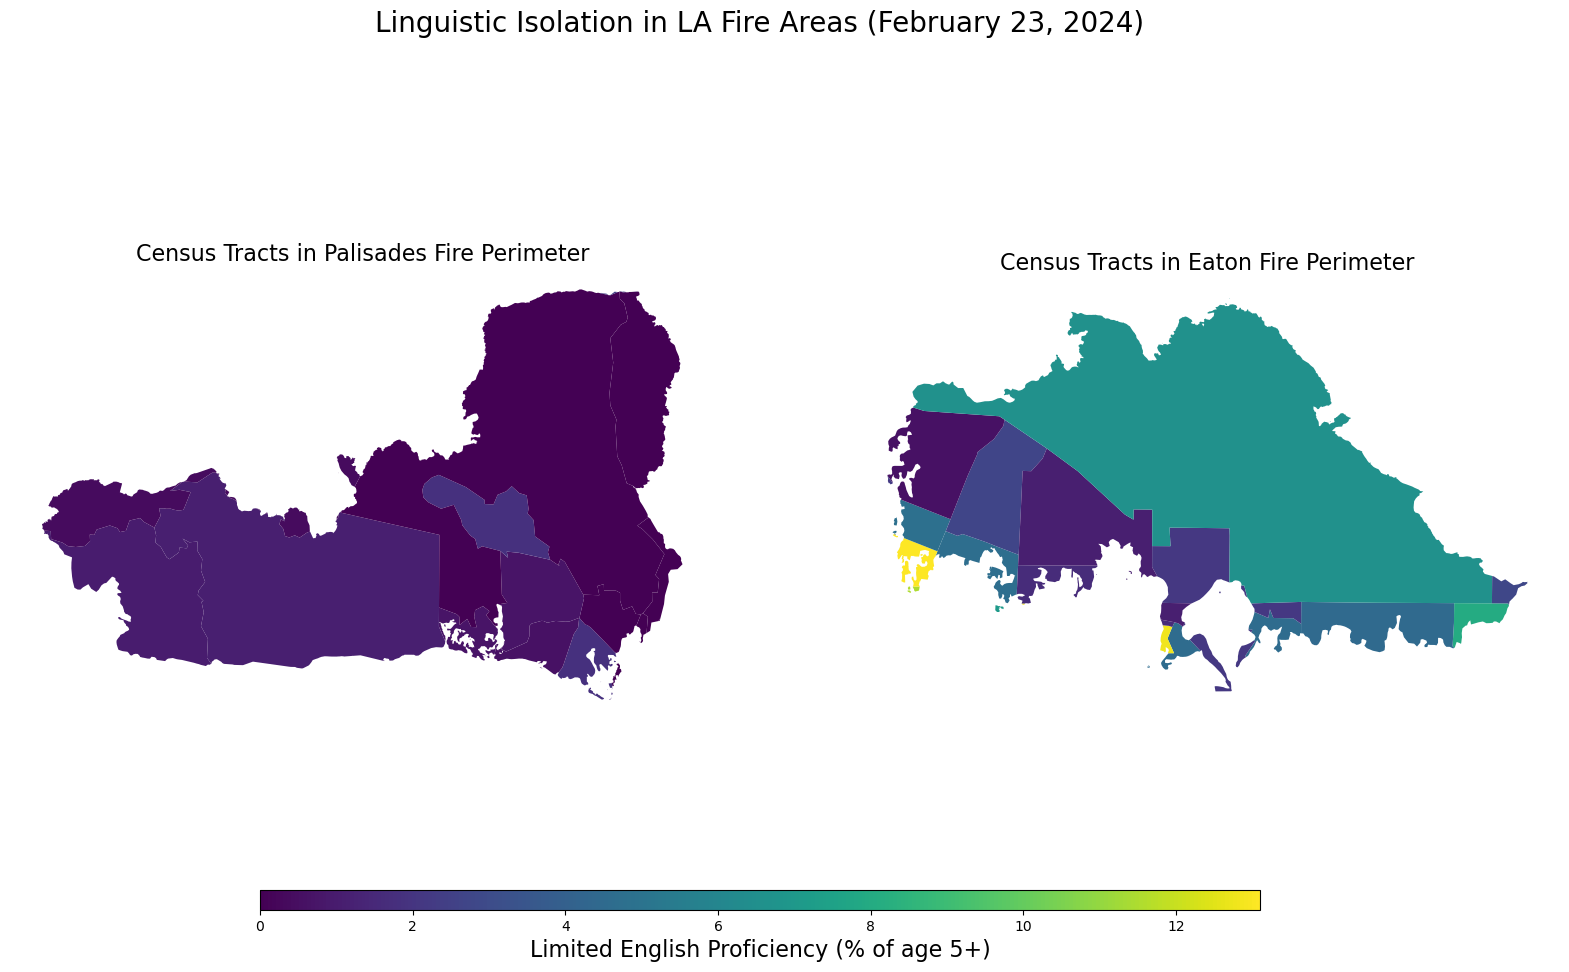

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# UPDATE WITH YOU EJI VARIABLE FROM STEP 1
eji_variable = 'E_LIMENG'

# Find common min/max for legend range
vmin = min(palisades_clipped[eji_variable].min(), eaton_clipped[eji_variable].min())
vmax = max(palisades_clipped[eji_variable].max(), eaton_clipped[eji_variable].max())

# Plot census tracts within Palisades perimeter
palisades_clipped.plot(
    column= eji_variable,
    vmin=vmin, vmax=vmax,
    legend=False,
    ax=ax1,
)
ax1.set_title('Census Tracts in Palisades Fire Perimeter', fontsize = 16)
ax1.axis('off')

# Plot census tracts within Eaton perimeter
eaton_clipped.plot(
    column=eji_variable,
    vmin=vmin, vmax=vmax,
    legend=False,
    ax=ax2,
)
ax2.set_title('Census Tracts in Eaton Fire Perimeter', fontsize = 16)
ax2.axis('off')

# Add overall title
fig.suptitle('Linguistic Isolation in LA Fire Areas (February 23, 2025)', fontsize = 20)

# Add shared colorbar at the bottom
sm = plt.cm.ScalarMappable( norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar_ax = fig.add_axes([0.25, 0.08, 0.5, 0.02])  # [left, bottom, width, height]
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Limited English Proficiency (% of age 5+)', fontsize = 16)

plt.show()